In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.animation as animation

import seaborn as sns;
from skimage.transform import rescale, resize, downscale_local_mean

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import cv2 
from sklearn.metrics import confusion_matrix

In [2]:
from PIL import Image
import glob
image_listA1 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A1.png')):
    im=Image.open(filename).convert('L')
    image_listA1.append(np.array(im).flatten())

In [3]:
image_listA2 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A2.png')):
    im=Image.open(filename).convert('L')
    image_listA2.append(np.array(im).flatten())

In [4]:
image_listA3 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A3.png')):
    im=Image.open(filename).convert('L')
    image_listA3.append(np.array(im).flatten())

In [5]:
image_listA4 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A4.png')):
    im=Image.open(filename).convert('L')
    image_listA4.append(np.array(im).flatten())

In [6]:
image_listA5 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A5.png')):
    im=Image.open(filename).convert('L')
    image_listA5.append(np.array(im).flatten())

In [7]:
image_listA6 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A6.png')):
    im=Image.open(filename).convert('L')
    image_listA6.append(np.array(im).flatten())

In [12]:
image_listB1 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/B/*B1.png')):
    im=Image.open(filename).convert('L')
    image_listB1.append(np.array(im).flatten())

In [ ]:
print(type(image_listA1[0]))

In [11]:
print(len(image_listB1))
print(len(image_listA1))
print(image_listA1[0][65535])

49
57
35


In [ ]:
plt.imshow(image_listA1[0].reshape(256,256),cmap="gray")
plt.show()

In [ ]:
plt.imshow(image_listA6[0])
plt.show()

In [ ]:
plt.imshow(image_listB1[0])
plt.show()

In [13]:
Inputs = []
Radar = []
for i in range(len(image_listA1)):
    for j in range(len(image_listA1[0])):
        x = []
        x.append(image_listA1[i][j])
        x.append(image_listA2[i][j])
        x.append(image_listA3[i][j])
        x.append(image_listA4[i][j])
        x.append(image_listA5[i][j])
        x.append(image_listA6[i][j])
        
        Radar.append(image_listB1[i][j])
        
        Inputs.append(x)

In [14]:
Inputs = np.array(Inputs)
Radar = np.array(Radar)

In [ ]:
print(Inputs.shape)
print(Radar.shape)

In [15]:
Input = np.concatenate((image_listA1,image_listA2,image_listA3,image_listA4,image_listA5,image_listA6),axis=1)
print(len(Input[0]))

393216


In [ ]:
plt.imshow(Input[0])
plt.show()

In [ ]:
print((Input[0][1]))

In [ ]:
flattened_listt = []
for index in range(len(Input)):
    for pixel in range(256): 
        flattened = Input[index][pixel].flatten()
        flattened_listt.append(flattened.tolist())
ftry = np.array(flattened_listt).reshape(-1,1)
print(len(ftry))

In [ ]:
def flatten(listin):
    flattened_list = []
    for index in range(len(listin)):
        for pixel in range(256): 
            flattened = listin[index][pixel].flatten()
            flattened_list.append(flattened.tolist())
    return flattened_list

In [ ]:
FlatInput = np.array(flatten(Input)).reshape(-1,1)
FlatRadar = np.array(flatten(image_listB1)).reshape(-1,1)
print(len(FlatRadar))
print(len(FlatInput))
print(FlatInput[1024])
print(FlatRadar[1024])

In [ ]:
'''
Linear Regression
'''
train_x = FlatInput[:-58368]
train_y = FlatRadar[:-58368]
test_x = FlatInput[-58368:]
test_y = FlatRadar[-58368:]

regr = linear_model.LinearRegression(normalize=False)

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the testing set
y_pred = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, y_pred))
print("Calculated mean squared error", np.mean(y_pred - test_y)**2)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred))
print('Intercept: ', regr.intercept_)
# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
'''
Linear Regression
'''
train_x = Inputs[:-65536]
train_y = Radar[:-65536]
test_x = Inputs[-65536:]
test_y = Radar[-65536:]
regr = linear_model.LinearRegression(normalize=False)

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the testing set
y_pred = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, y_pred))
print("Calculated mean squared error", np.mean(y_pred - test_y)**2)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred))
print('Intercept: ', regr.intercept_)

Coefficients: 
 [ 0.00658671 -0.04822761 -0.05972578 -0.00197233  0.00765351 -0.00489003]
Mean squared error: 106.34
Calculated mean squared error 1.1012530163773546
Variance score: 0.03
Intercept:  23.999517756175344


In [ ]:
# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
print(test_x.size)
print(test_y.size)

In [ ]:
resh = np.array(image_listA1).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
resh = np.array(image_listA2).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
resh = np.array(image_listA3).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
resh = np.array(image_listA4).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
resh = np.array(image_listA5).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
resh = np.array(image_listA6).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
plt.imshow(y_pred.reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
plt.imshow(test_y.reshape(256, 256), cmap='gray')
plt.show()

In [20]:
input_names = ["Sat Band 2","Sat Band 6","Mod Visibility Feature","Mod Relative Humidity Feature","Mod Specific Humidty Feature","Mod Temperature at the surface Feature"]
X_names = np.asarray(input_names)

In [21]:
regr.coef_

array([ 0.00658671, -0.04822761, -0.05972578, -0.00197233,  0.00765351,
       -0.00489003])

In [22]:
for feat, coef in zip(X_names, regr.coef_):
    print('{}       {}'.format(feat, coef))

Sat Band 2       0.006586711492964128
Sat Band 6       -0.04822761350660772
Mod Visibility Feature       -0.05972577518858085
Mod Relative Humidity Feature       -0.001972327680450401
Mod Specific Humidty Feature       0.007653508527873743
Mod Temperature at the surface Feature       -0.0048900269513936995


In [23]:
df = pd.DataFrame({'Features':input_names, 'coeff':regr.coef_})

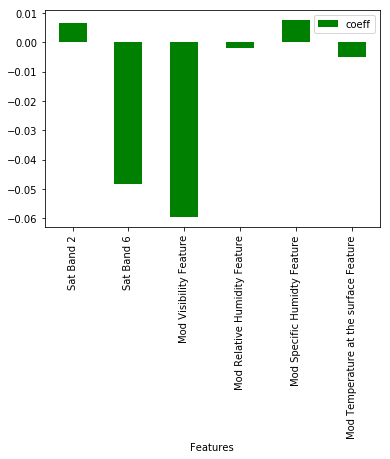

In [24]:
df.plot.bar(x='Features', y='coeff', color=("g"),rot=90)
plt.show()

In [25]:
Output = y_pred.reshape(256, 256)
Original = test_y.reshape(256, 256)

In [26]:
th1 = cv2.threshold(Output,1,255,cv2.THRESH_BINARY)
th2 = cv2.threshold(Original,1,255,cv2.THRESH_BINARY)
FR = list(th1[1].flatten())
FF = list(th2[1].flatten())

In [35]:
tn,fp,fn,tp=confusion_matrix(FR, FF).ravel()
print(tn,fp,fn,tp)

30158 442 32306 2630


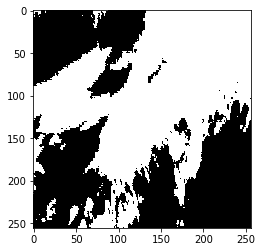

In [28]:
plt.imshow(th1[1],cmap = 'gray')
plt.show()

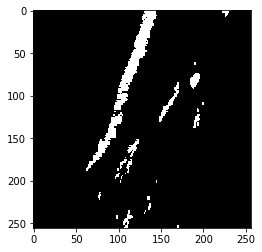

In [29]:
plt.imshow(th2[1],cmap = 'gray')
plt.show()

In [38]:
Total = tn+fp+fn+tp
print(Total)

65536


In [39]:
PTN = (tn/Total)*100
PFP = (fp/Total)*100
PFN = (fn/Total)*100
PTP = (tp/Total)*100

In [41]:
print(PTN,PFP,PFN,PTP)

46.0174560546875 0.6744384765625 49.2950439453125 4.0130615234375


In [32]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  50.030517578125  Wrong =  49.969482421875


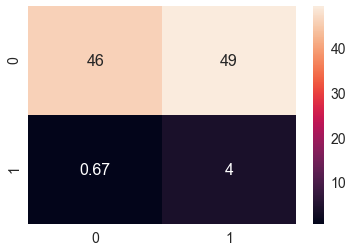

In [42]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFN],
        [PFP,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [53]:
NN = fn+tn
NP = fp+tp

In [54]:
NPTN = (tn/NN)
NPFP = (fp/NP)
NPFN = (fn/NN)
NPTP = (tp/NP)

In [56]:
print(NPFN)

0.5171939036885246


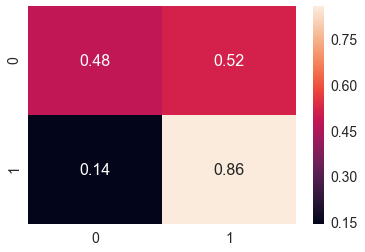

In [65]:
array = [[NPTN,NPFN],[NPFP,NPTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

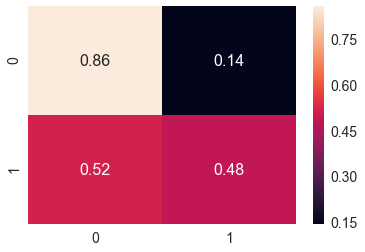

In [64]:
array = [[NPTP,NPFP],[NPFN,NPTN]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size